In [1]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np

# For preprocessing the data
#from sklearn.preprocessing import Imputer
from sklearn import preprocessing

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
location = r'E:\Python\Machine Learning\datasets\adult.data.csv'

In [3]:
df_adult_income = pd.read_csv(location, skiprows=1, header=None, delimiter=' *, *', engine='python')

In [4]:
df_adult_income.shape

(32561, 15)

In [4]:
df_adult_income.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
# Adding the columns 

df_adult_income.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                            'marital_status', 'occupation', 'relationship',
                            'race', 'sex', 'capital_gain', 'capital_loss',
                            'hours_per_week', 'native_country', 'income']


#### Handling Missing Data

In [6]:
# Finding Null values

df_adult_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

- test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values.

In [7]:
df_adult_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
for col in ['workclass', 'education',
            'marital_status', 'occupation',
            'relationship','race', 'sex',
            'native_country', 'income']:
    
    print (col, ":", sum(df_adult_income[col] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


The output of the above code snippet shows that there are 
- 1836 missing values in __workclass__ attribute. 
- 1843 missing values in __occupation__ attribute and 
-  583 missing values in __native_country__ attribute.

In [9]:
# save the dataframe
df_adult_income_copy = df_adult_income.copy()

In [20]:
# summary stats
df_adult_income_copy.describe(include= 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
df_adult_income_copy.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### Data Imputation 

Some of our categorical values have missing values i.e, “?”. We are going to replace the “?” with the above describe methods top row’s value. For example, we are going to replace the “?” values of workplace attribute with “Private” value.

In [17]:
for col in ['workclass', 'education',
            'marital_status', 'occupation',
            'relationship','race', 'sex',
            'native_country', 'income']:
    
    df_adult_income_copy[col].replace(['?'], 
                                      [df_adult_income_copy.describe(include='all')[col][2]],
                                      inplace=True)

In [26]:
#df_adult_income_copy.describe(include='all')['workclass']
#df_adult_income_copy.describe(include='all')['workclass'][2]

In [18]:
for col in ['workclass', 'education',
            'marital_status', 'occupation',
            'relationship','race', 'sex',
            'native_country', 'income']:
    
    print (col, ":", sum(df_adult_income_copy[col] == '?'))

workclass : 0
education : 0
marital_status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
native_country : 0
income : 0


In [19]:
df_adult_income_copy.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
df_adult_income_copy.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### categorical to numeric conversion - label Encoder

In [26]:
le = preprocessing.LabelEncoder()

In [31]:
for i in df_adult_income_copy[['workclass','education','marital_status','occupation','relationship','race','sex','native_country']]:
    df_adult_income_copy[i]  = le.fit_transform(df_adult_income_copy[i])

In [32]:
df_adult_income_copy

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


In [30]:
"""workclass_cat       = le.fit_transform(df_adult_income_copy.workclass)
education_cat       = le.fit_transform(df_adult_income_copy.education)
marital_cat         = le.fit_transform(df_adult_income_copy.marital_status)
occupation_cat      = le.fit_transform(df_adult_income_copy.occupation)
relationship_cat    = le.fit_transform(df_adult_income_copy.relationship)
race_cat            = le.fit_transform(df_adult_income_copy.race)
sex_cat             = le.fit_transform(df_adult_income_copy.sex)
native_country_cat  = le.fit_transform(df_adult_income_copy.native_country)"""

In [31]:
# initialize the encoded categorical columns
"""df_adult_income_copy['workclass_cat']      = workclass_cat
df_adult_income_copy['education_cat']      = education_cat
df_adult_income_copy['marital_cat']        = marital_cat
df_adult_income_copy['occupation_cat']     = occupation_cat
df_adult_income_copy['relationship_cat']   = relationship_cat
df_adult_income_copy['race_cat']           = race_cat
df_adult_income_copy['sex_cat']            = sex_cat
df_adult_income_copy['native_country_cat'] = native_country_cat"""

In [33]:
# drop the old categorical columns from dataframe
dummy_fields = [  'workclass', 'education', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'native_country']

df_adult_income_copy = df_adult_income_copy.drop(dummy_fields, axis = 1)

In [34]:
df_adult_income_copy.head(5)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


In [34]:
# df_adult_income_copy = df_adult_income_copy.reindex_axis(['age', 'workclass_cat', 'fnlwgt', 'education_cat',
#                                     'education_num', 'marital_cat', 'occupation_cat',
#                                     'relationship_cat', 'race_cat', 'sex_cat', 'capital_gain',
#                                     'capital_loss', 'hours_per_week', 'native_country_cat', 
#                                     'income'], axis= 1)
 

In [35]:
df_adult_income_copy.dtypes

age                int64
fnlwgt             int64
education_num      int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
income            object
dtype: object

#### Standardization of Data
to convert number in to 0 to 1

In [36]:
num_features = ['age', 'fnlwgt', 'education_num',
                'capital_gain', 'capital_loss', 'hours_per_week'
               ]
 
scaled_features = {}

for each in num_features:
    
    mean, std = df_adult_income_copy[each].mean(), df_adult_income_copy[each].std()
    scaled_features[each] = [mean, std]
    
    df_adult_income_copy.loc[:, each] = (df_adult_income_copy[each] - mean)/std

In [37]:
df_adult_income_copy.head(5)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
0,0.030670,-1.063594,1.134721,0.148451,-0.216656,-0.035429,<=50K,6,9,4,0,1,4,1,38
1,0.837096,-1.008692,1.134721,-0.145918,-0.216656,-2.222119,<=50K,5,9,2,3,0,4,1,38
2,-0.042641,0.245075,-0.420053,-0.145918,-0.216656,-0.035429,<=50K,3,11,0,5,1,4,1,38
3,1.057031,0.425795,-1.197440,-0.145918,-0.216656,-0.035429,<=50K,3,1,2,5,0,2,1,38
4,-0.775756,1.408154,1.134721,-0.145918,-0.216656,-0.035429,<=50K,3,9,2,9,5,2,0,4


In [36]:
df_adult_income_copy.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [37]:
income_num = {"income": {"<=50K": 0, ">50K": 1}}

In [38]:
df_adult_income_copy.replace(income_num, inplace=True)
df_adult_income_copy.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [40]:
X = df_adult_income_copy.drop(['income'], axis=1)
y = df_adult_income_copy.income.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

In [41]:
clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#### Accuracy of our Gaussian Naive Bayes model

In [42]:
accuracy_score(y_test, y_pred, normalize = True)

0.7924809231341895

# Normality test

In [39]:
df_adult_income_copy.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income'],
      dtype='object')

In [43]:
df_adult_income_copy.dtypes

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
income            int64
dtype: object

In [44]:
num_columns = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']

#### check normality thru visual plots

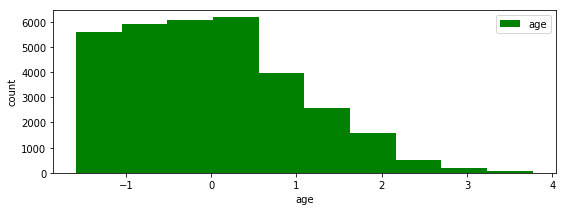

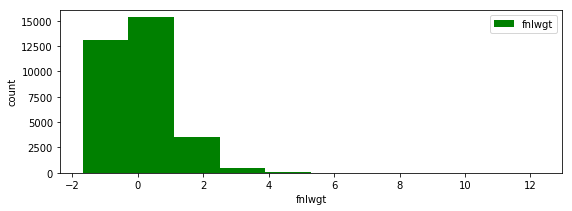

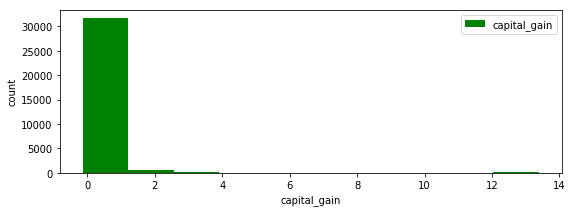

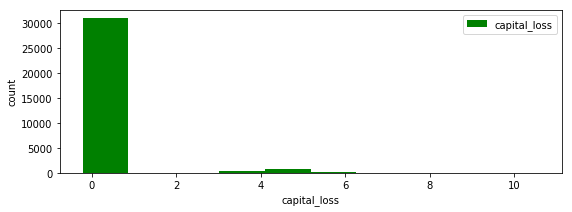

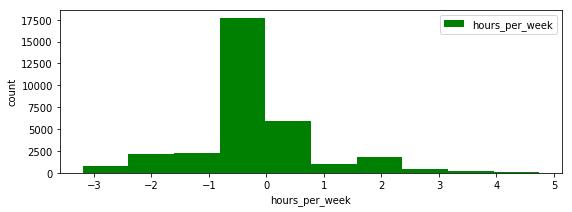

In [47]:
# using standardized data

for num_col in num_columns:
    fig, ax = plt.subplots(figsize=(9, 3))
    
    ax.hist(df_adult_income_copy[num_col], label=num_col, color='g')
    ax.set_xlabel(num_col)
    ax.set_ylabel('count')
    ax.legend();

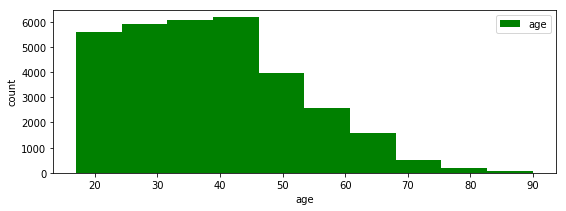

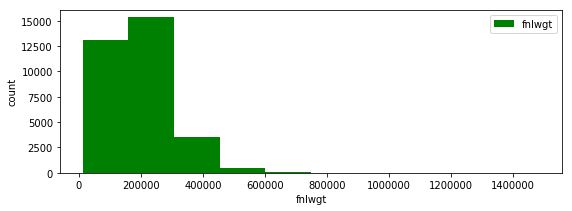

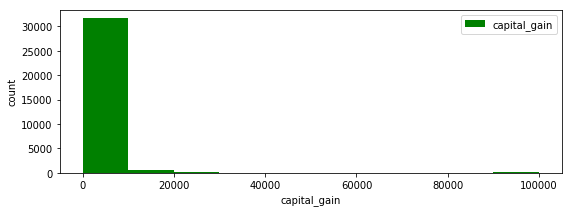

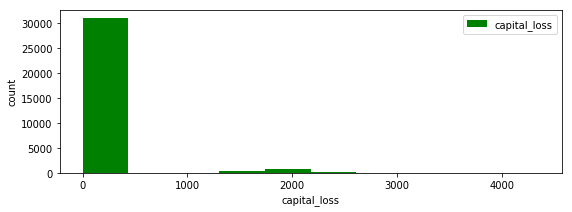

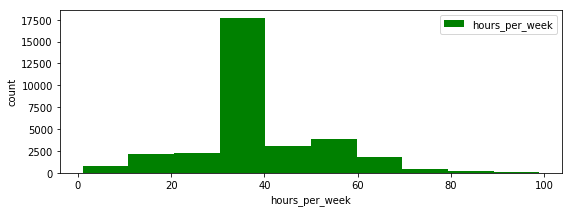

In [36]:
# using original data

for num_col in num_columns:
    fig, ax = plt.subplots(figsize=(9, 3))
    
    ax.hist(df_adult_income[num_col], label=num_col, color='g')
    ax.set_xlabel(num_col)
    ax.set_ylabel('count')
    ax.legend();

#### Statistical Normality Tests

- $H_0 :$ sample drawn from a Gaussian distribution
- $H_A :$ sample NOT drawn from a Gaussian distribution

Types of normality tests

1. Shapiro-Wilk Test
2. D’Agostino’s K^2 Test
3. Anderson-Darling Test

In [45]:
# Shapiro-Wilk, D’Agostino’s K^2 & Anderson-Darling Test

from numpy.random import seed
from numpy.random import randn

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

for num_col in num_columns:
    
    data = df_adult_income[num_col].values

    # normality test
    stat_shapiro, p_shapiro       = shapiro(data)
    stat_normaltest, p_normaltest = normaltest(data)
    result                        = anderson(data)
    
    print('Shapiro  test: Column : %15s, Statistic=%.3f, p=%.6f, ' % (num_col, stat_shapiro, p_shapiro), end=' > ')
        
    # interpret
    alpha = 0.05
    if p_shapiro > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
    print('K^2      test: Column : %15s, Statistic=%.3f, p=%.6f, ' % (num_col, stat_normaltest, p_normaltest), end=' > ')
    
    # interpret
    alpha = 0.05
    if p_normaltest > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    
    print('Anderson test: Column : %15s, Statistic=%.3f ' % (num_col, result.statistic))
    
    #print('Anderson test: Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('\t%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('\t%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Shapiro  test: Column :             age, Statistic=0.967, p=0.000000,  > Sample does not look Gaussian (reject H0)
K^2      test: Column :             age, Statistic=1526.011, p=0.000000,  > Sample does not look Gaussian (reject H0)
Anderson test: Column :             age, Statistic=238.083 
	15.000: 0.576, data does not look normal (reject H0)
	10.000: 0.656, data does not look normal (reject H0)
	5.000: 0.787, data does not look normal (reject H0)
	2.500: 0.918, data does not look normal (reject H0)
	1.000: 1.092, data does not look normal (reject H0)
Shapiro  test: Column :          fnlwgt, Statistic=0.922, p=0.000000,  > Sample does not look Gaussian (reject H0)
K^2      test: Column :          fnlwgt, Statistic=10662.514, p=0.000000,  > Sample does not look Gaussian (reject H0)
Anderson test: Column :          fnlwgt, Statistic=386.780 
	15.000: 0.576, data does not look normal (reject H0)
	10.000: 0.656, data does not look normal (reject H0)
	5.000: 0.787, data does not look norm

C:\Users\Amrita\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### transforming non-normal data to normal

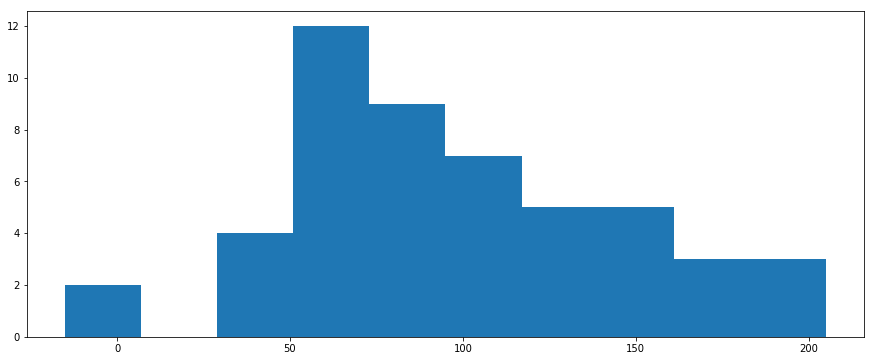

In [49]:
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(50) + 100
# histogram
plt.hist(data);


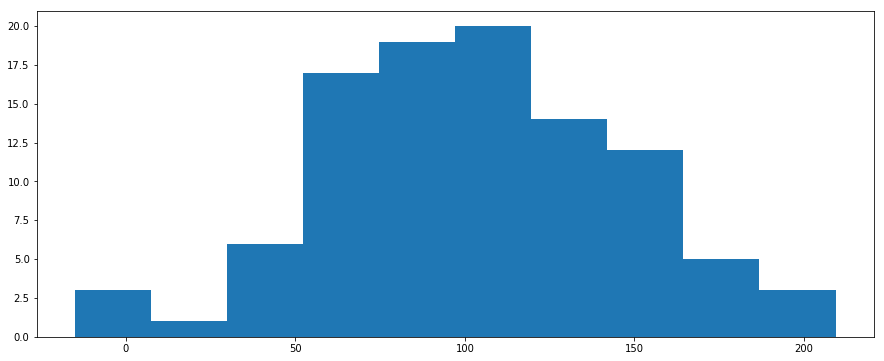

In [50]:
# seed the random number generator
seed(1)

# generate a univariate data sample
data = 50 * randn(100) + 100

# histogram
plt.hist(data);

- we can see the Gaussian distribution of the data that would pass both statistical tests and eye-ball checks.

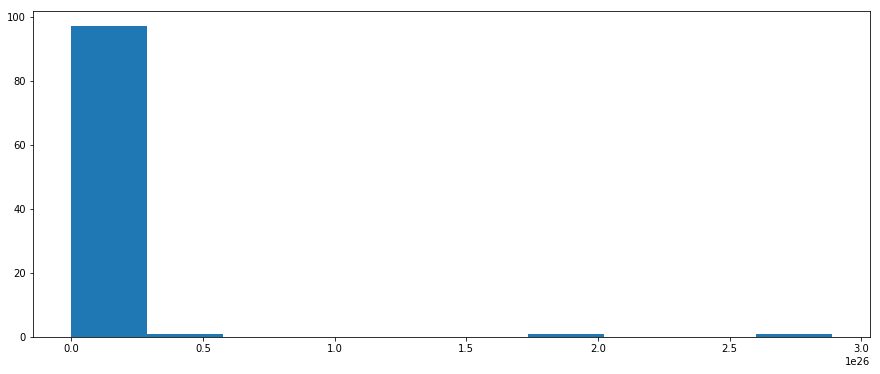

In [41]:
from numpy import exp
# seed the random number generator
seed(1)

# generate two sets of univariate observations
data = 5 * randn(100) + 50

# transform to be exponential
data = exp(data)

# histogram
plt.hist(data);

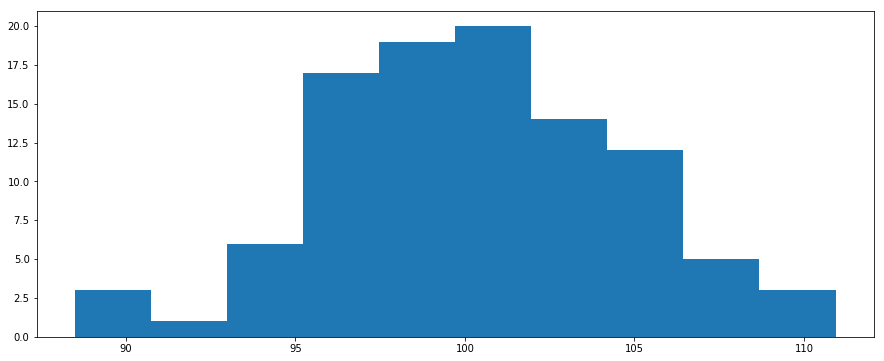

In [42]:
from numpy import exp
from scipy.stats import boxcox

# seed the random number generator
seed(1)

# generate two sets of univariate observations
data = 5 * randn(100) + 100

# transform to be exponential
data = exp(data)

# power transform
data = boxcox(data, 0)

# histogram
plt.hist(data);

- back to the main code ...

In [46]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


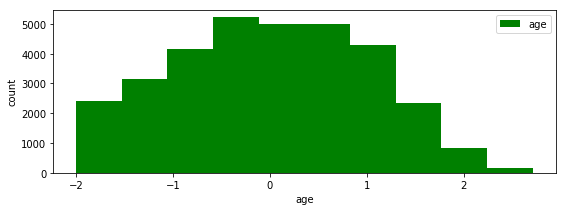

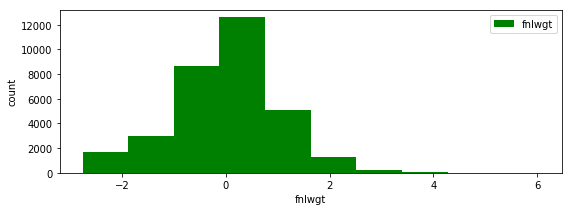

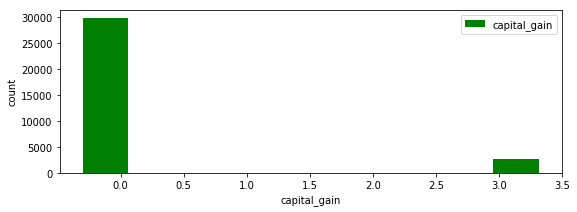

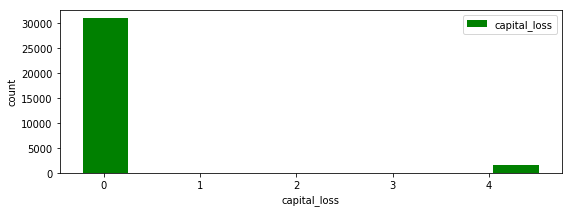

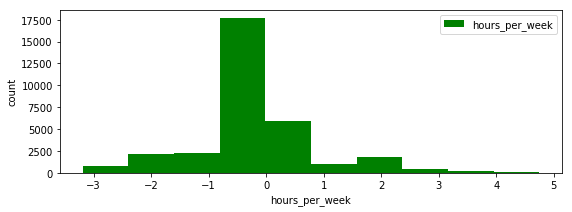

In [51]:
# using original data
from numpy import exp
from scipy.stats import boxcox
import sklearn
from sklearn.preprocessing import PowerTransformer

for num_col in num_columns:
    fig, ax = plt.subplots(figsize=(9, 3))
    
    # power transform
    data = df_adult_income[num_col].values.reshape(-1, 1)
    
    # method - box-cox transformation
    # data = boxcox(data, 0)
    
     # method - yeo-johnson transformation
    pt = PowerTransformer(method='yeo-johnson')
    pt.fit(data)
    data = pt.transform(data)
    
    ax.hist(data, label=num_col, color='g')
    ax.set_xlabel(num_col)
    ax.set_ylabel('count')
    ax.legend();